In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv(r".\data\pima.csv")
data.head(5)

,num_pregnant,gtt,bp,tricep,insulin,bmi,diabetes,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df = data.iloc[:, 0:-1]
df = df.mask(np.random.random(df.shape) < .1)
df["class"] = data["class"]
df.head(5)

,num_pregnant,gtt,bp,tricep,insulin,bmi,diabetes,age,class
0,6.0,148.0,72.0,NaN,0.0,NaN,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,NaN,89.0,66.0,23.0,94.0,NaN,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [4]:
x_org = df.iloc[:, 0:-1].values
y_org = df.iloc[:, -1].values

num_iter = 100
trees = 100
items, cols = x_org.shape

error = list()

In [5]:
x = df.groupby("class").transform(lambda x: x.fillna(x.mean())).values

for _ in range(num_iter):
    # training on the imputed data using random forest
    clf = RandomForestClassifier(n_estimators=trees, random_state=0)
    clf.fit(x, y_org)
    
    # creating proximity matrix
    forest_tree_index = clf.apply(x)
    for tree in range(trees):
        tree_leaf_index = forest_tree_index[:, tree].reshape(items,1)
        tree_proximity_matrix = (cdist(tree_leaf_index, tree_leaf_index) == 0) * 1
        if tree == 0:
            proximity_matrix = tree_proximity_matrix
        else:
            proximity_matrix = proximity_matrix + tree_proximity_matrix
    proximity_matrix = proximity_matrix/trees
    np.fill_diagonal(proximity_matrix, 0)

    # imputation on nth iteration
    temp_all = list()
    for i in range(cols):
        temp = list()
        for j in range(items):
            if np.isnan(x_org[j,i]):
                temp.append((proximity_matrix[j]*x[:, i]).sum()/proximity_matrix[j].sum())
            else:
                temp.append(x_org[j,i])
        temp_all.append(temp)
    x = np.array(temp_all).T
    error.append(((data.iloc[:,0:-1].values-x)**2).sum())
dx = pd.DataFrame(x, columns=df.columns[0:-1])
dx["class"] = y_org

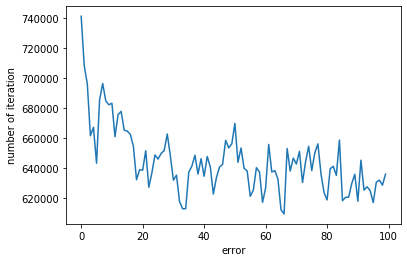

In [6]:
plt.plot(error)
plt.xlabel("error")
plt.ylabel("number of iteration");

In [7]:
dx

,num_pregnant,gtt,bp,tricep,insulin,bmi,diabetes,age,class
0,6.000000,148.0,72.0,21.863497,0.0,35.477282,0.627,50.000000,1
1,1.000000,85.0,66.0,29.000000,0.0,26.600000,0.351,31.000000,0
2,8.000000,183.0,64.0,0.000000,0.0,23.300000,0.672,32.000000,1
3,1.802803,89.0,66.0,23.000000,94.0,27.086860,0.167,21.000000,0
4,0.000000,137.0,40.0,35.000000,168.0,43.100000,2.288,33.000000,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.0,32.900000,0.171,63.000000,0
764,2.000000,122.0,70.0,27.000000,0.0,36.800000,0.340,27.000000,0
765,5.000000,121.0,72.0,23.000000,112.0,27.269394,0.245,25.640121,0
766,1.000000,126.0,60.0,0.000000,0.0,33.967188,0.349,47.000000,1


In [8]:
data

,num_pregnant,gtt,bp,tricep,insulin,bmi,diabetes,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df

,num_pregnant,gtt,bp,tricep,insulin,bmi,diabetes,age,class
0,6.0,148.0,72.0,NaN,0.0,NaN,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,NaN,89.0,66.0,23.0,94.0,NaN,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,NaN,0.245,NaN,0
766,1.0,126.0,60.0,0.0,0.0,NaN,0.349,47.0,1
